In [108]:
from IPython.core.display import HTML
HTML("""
<style>
.consignes{
  font-weight: bold;
  color: #3256a8;
  background-color: #edebdf
}
</style>
""")



# <div class=consignes>Deep Learning et traitement du signal TP 1 </div>
<div class=consignes> L'objectif de ce TP est de prendre en main les outils de modélisation et d'analyse du signal présentés dans le premier cours et d'introduire la problématique de <it>détection</it> dont on parlera dans le cours numéro 3 </div>
<div class=consignes>Deadline : 16 octobre 2024, 13h59, par mail à deepetsignal.mva@gmail.com <br> Effort estimé : 2 à 3 heures maximum</div>
<div class=consignes>Le rendu de ce TP n'est pas obligatoire. Il permet d'obtenir un bonus de 1 (minimum syndical) à 3 (votre notebook servira de correction l'an prochain) points sur la moyenne des TP </div>

<div class=consignes> Listez les noms des étudiants (2 au maximum) ayant participé à ce notebook dans la cellule suivante (prénom, nom).<br/>
Au moment du rendu, le notebook doit être nommé nom1_nom2_dlts_tp1.ipynb </div>

Grégoire Béchade

<div class=consignes>Si vous installez des paquets supplémentaires, merci de les lister dans la cellule suivante avec la syntaxe
    
```
!pip install \< nom_du_paquet \>
```
    
</div>

In [109]:
import numpy as np 
import matplotlib.pylab as plt 
import scipy
import IPython.display as ipd

## <div class=consignes>Partie 1: Audio </div>

### <div class=consignes>Visualisation</div>

 <div class=consignes>Enregistrez un fichier wav de quelques secondes de votre voix. 
  <br>
 Importez le avec scipy.io.wavfile.read et écoutez le dans le notebook avec IPython.display.Audio
</div>

In [110]:
my_voice = scipy.io.wavfile.read('voix_bechade.wav')
freqcy=my_voice[0]
my_voice=my_voice[1].T[0] # taking only one of the two signals (it is a stereo signal)

ipd.Audio('voix_bechade.wav')

<div class=consignes>Visualisez la forme d'onde temporelle de ce signal audio. <br>
Estimez et affichez sa Densité Spectrale de Puissance. <br>
Donnez une interprétation de ce que vous observez. 
    </div>

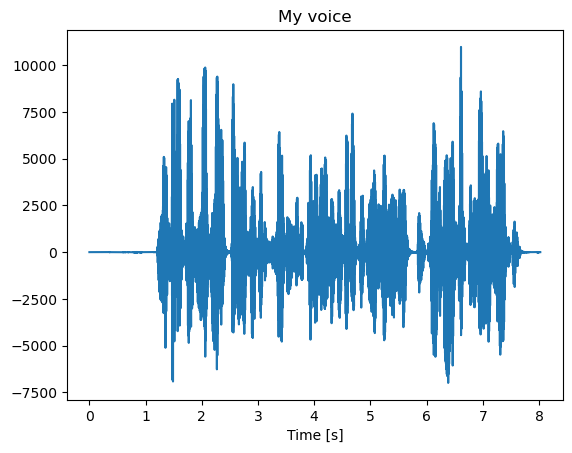

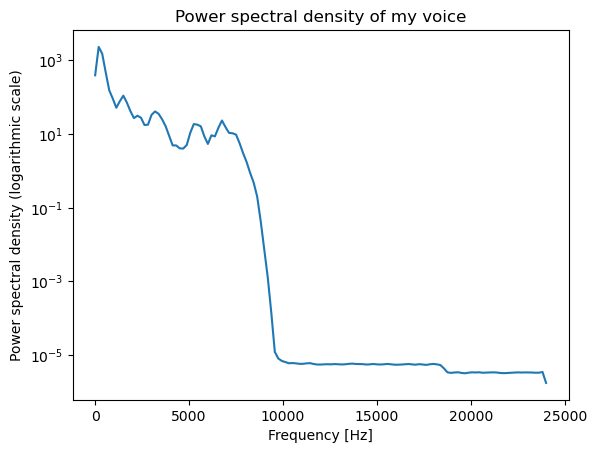

The frequency of my voice is under 6000 Hz, but there is no clear distinction between the different frequencies.


In [111]:
time=np.linspace(0, len(my_voice)/freqcy, num=len(my_voice)) # 
plt.plot(time, my_voice)
plt.xlabel('Time [s]')
plt.title('My voice')
plt.show()

pds=scipy.signal.welch(my_voice, freqcy)
plt.semilogy(pds[0], pds[1])
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power spectral density (logarithmic scale)')
plt.title('Power spectral density of my voice')
plt.show()

print('The frequency of my voice is under 6000 Hz, but there is no clear distinction between the different frequencies.')

<div class=consignes> Calculez et affichez le spectrogramme du signal. <br>
Justifiez du choix des réglages que vous avez faits. <br>
Sélectionnez une portion pertinente du spectrogramme pour estimer visuellement le pitch de votre voix.
    </div>

C:\Users\grego\AppData\Local\Temp\ipykernel_26988\59060185.py:4: RuntimeWarning: divide by zero encountered in log
  plt.pcolormesh(times, frequencies, np.log(Sxx)) # warning logarithmic scale


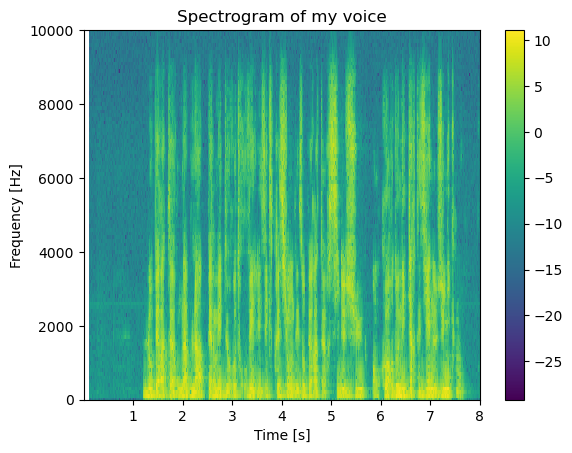

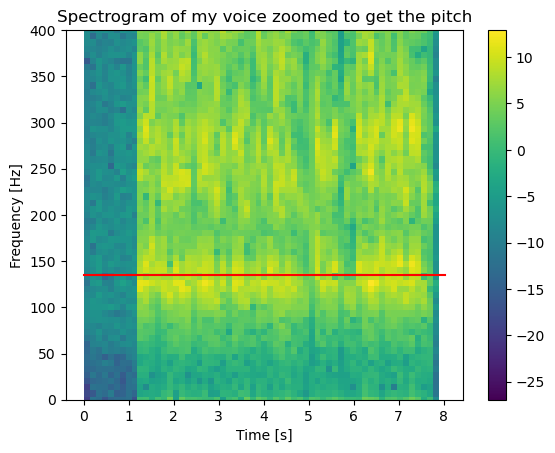

Based on this diagram, I think that the pitch of my voice is around 135 Hz.


In [248]:
scale=0.1 # found manually so that the spectrogram is readable
nperseg=int(scale*0.1 * freqcy) # begin to have a time resolution of 100 ms
frequencies, times, Sxx = scipy.signal.spectrogram(my_voice, fs=freqcy, nperseg=nperseg)
plt.pcolormesh(times, frequencies, np.log(Sxx)) # warning logarithmic scale
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.title('Spectrogram of my voice')
plt.colorbar()
plt.ylim(0, 10000)
plt.show()

scale2=1.5 # using another scale
nperseg2=int(scale2*0.1 * freqcy) # begin to have a time resolution of 100 ms
frequencies2, times2, Sxx2 = scipy.signal.spectrogram(my_voice, fs=freqcy, nperseg=nperseg2)
plt.pcolormesh(times2, frequencies2 , np.log(Sxx2)) # warning logarithmic scale
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.title('Spectrogram of my voice zoomed to get the pitch')
plt.colorbar()
plt.ylim(0, 400)
plt.plot([0, len(my_voice)/freqcy], [135, 135], 'r') # red line to see the pitch
plt.show()
print('Based on this diagram, I think that the pitch of my voice is around 135 Hz.')

### <div class=consignes>Calcul du Pitch</div>

<div class=consignes>Proposez une méthode simple pour estimer automatiquement le Pitch de votre voix (cette méthode ne doit pas faire intervenir d'implémentations externes).

Utilisez cette méthode pour estimer les variations du Pitch le long du signal, estimez le pitch toutes les 20 ms et présentez vos résultats sous forme visuelle. 

Ne pas utiliser de méthode "toute faite" que vous pourriez par exemple trouver dans la bibliothèque librosa.

Commentez vos résultats.
    </div>

C:\Users\grego\AppData\Local\Temp\ipykernel_26988\2019776987.py:4: RuntimeWarning: divide by zero encountered in log
  plt.pcolormesh(times3, frequencies3 , np.log(Sxx3)) # warning logarithmic scale


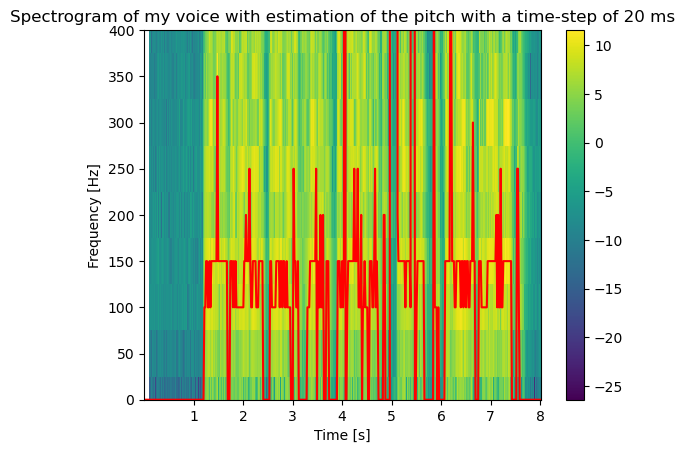

In [240]:

scale3=0.2 # using another scale to have a time resolution of 20 ms
nperseg3=int(scale3*0.1 * freqcy) # time-step = 20 ms
frequencies3, times3, Sxx3 = scipy.signal.spectrogram(my_voice, fs=freqcy, nperseg=nperseg3) # spectrogram at this resolution
plt.pcolormesh(times3, frequencies3 , np.log(Sxx3)) # warning logarithmic scale
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.title('Spectrogram of my voice with estimation of the pitch with a time-step of 20 ms')
plt.colorbar()
plt.ylim(0, 400)


pitchs=[]
for number in range(len(Sxx3.T)): 
    pitch_found=False
    for i in range(len(Sxx3.T[number])): # for each time step, we look for the first maximum  that is not too little and assume that it is the pitch
        if Sxx3.T[number][i]>1000 and Sxx3.T[number][i+1]<Sxx3.T[number][i] and Sxx3.T[number][i-1]<Sxx3.T[number][i]:
            pitchs.append(frequencies3[i])
            pitch_found=True
            break
    if not pitch_found: # if there is no maximum, we put 0
        pitchs.append(0)
plt.plot(times3, pitchs, 'r') # red line to see the pitch
plt.show()


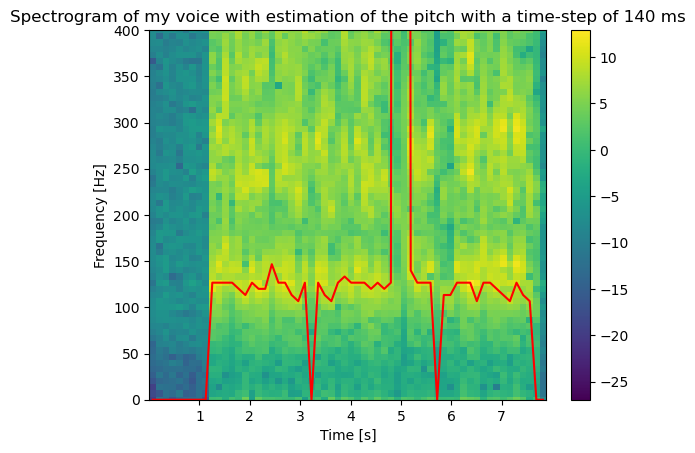

This time scale seems more relevant, but it is 7 times larger than the one requested.


In [372]:

plt.pcolormesh(times2, frequencies2 , np.log(Sxx2)) # warning logarithmic scale
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.title('Spectrogram of my voice with estimation of the pitch with a time-step of 140 ms')
plt.colorbar()
plt.ylim(0, 400)


pitchs=[]
for number in range(len(Sxx2.T)): 
    pitch_found=False
    for i in range(len(Sxx2.T[number])): # for each time step, we look for the first maximum
        if Sxx2.T[number][i]>1000 and Sxx2.T[number][i+1]<Sxx2.T[number][i] and Sxx2.T[number][i-1]<Sxx2.T[number][i]:
            pitchs.append(frequencies2[i])
            pitch_found=True
            break
    if not pitch_found: # if there is no maximum, we put 0
        pitchs.append(0)
plt.plot(times2, pitchs, 'r') # red line to see the pitch
plt.show()
print('This time scale seems more relevant, but it is 7 times larger than the one requested.')

## <div class=consignes>Partie 2: Détection d'impulsion </div>

<div class=consignes> Un signal de durée 1 seconde et échantillonné à 1000 Hz est composé d'un bruit blanc gaussien de puissance inconnue et éventuellement d'une impulsion à une fréquence f0 comprise entre 100 et 200 Hz. 
<br><br>
Une série de 1000 signaux est enregistrée dans le fichier signaux_impulsions.npz. 
Ouvez ce fichier avec numpy (cf code plus bas). Le fichier contient une tableau signaux 10000 x 1000 dont chaque ligne contient un signal de durée 1000. Le fichiez contient aussi un tableau labels de taille 10000 dont la ligne i est à TRUE si le signal i contient une impulsion et à 0 sinon. 

</div>

In [260]:
donnees = np.load('signaux_impulsions.npz')
signaux = donnees['data']
labels = donnees['labels']

## <div class=consignes> Première méthode </div>

<div class=consignes> Proposez une méthode simple  pour décider si un signal contient une impulsion ou non à partir du calcul de l'énergie du signal. Cette méthode fera intervenir un seuil: 
</div>

```python
def contient_impulsion_energie(signal: np.ndarray, seuil: float) -> bool:
```

In [331]:
def contient_impulsion_energie(signal: np.ndarray, seuil: float) -> bool:
    pds=scipy.signal.welch(signal, 1000) # power spectral density fo the signal
    return max(pds[1])>np.mean(pds[1])*seuil # if there is an impulsion, the DSP is not constant, there is a peak
  

<div class=consignes>
Utilisez votre méthode avec un seuil fixé sur tous les signaux pour prédire s'ils contiennent une impulsion ou non. 
</div>

In [351]:
seuil=5
detection=[contient_impulsion_energie(signaux[i], seuil) for i in range(len(signaux))] # detection of the impulsion


<div class=consignes>
Calculez: <br>
- VP = le nombre de signaux que vous détectez comme contenant une impulsion qui contiennet effectivement une impulsion <br>
- FP = le nombre de signaux que vous détectez comme contenant une impulsion qui ne contiennet en fait PAS une impulsion <br>
- VN = le nombre de signaux que vous détectez comme ne contenant PAS une impulsion qui ne contiennet effectivement PAS une impulsion<br>
- FN = le nombre de signaux que vous détectez comme ne contenant PAS une impulsion mais qui  contiennet en fait une impulsion
</div>

In [353]:
def compute_VP_FP_TN_FN(detection: list, labels: list) -> tuple:
    VP=0
    FP=0
    TN=0
    FN=0
    for i in range(len(detection)):
        if detection[i] and labels[i]:
            VP+=1
        elif detection[i] and not labels[i]:
            FP+=1
        elif not detection[i] and labels[i]:
            FN+=1
        else:
            TN+=1
    return (VP, FP, TN, FN)


VP, FP, TN, FN = compute_VP_FP_TN_FN(detection, labels)
print('VP', VP)
print('FP', FP)
print('TN', TN)
print('FN', FN)

VP 4010
FP 0
TN 4996
FN 994


## <div class=consignes>Deuxième méthode </div>

<div class=consignes>Proposez une deuxième méthode faisant par exemple intervenir le spectrogramme du signal. Cette méthode fera encore intervenir un seuil
</div>

```python
def contient_impulsion_spectrogramme(signal: np.ndarray, seuil: float) -> bool:
```


In [333]:
def contient_impulsion_spectrogramme(signal: np.ndarray, seuil: float) -> bool:
    _, _,  Sxx = scipy.signal.spectrogram(signal, fs=1000, nperseg=30) # spectrogram of the signal
    return np.max(Sxx)/np.mean(Sxx) > seuil  # if there is a huge difference in a zone of the spectrogram, there is an impulsion



In [359]:
seuil=10
detection=[contient_impulsion_spectrogramme(signaux[i], seuil) for i in range(len(signaux))] # detection of the impulsion (1 for impulsion, 0 for no impulsion)

<div class=consignes> Calculez pour cette nouvelle méthode, pour un certain seuil les valeurs de VP, FP, VN, FN </div>

In [360]:
VP2, FP2, VN2, FN2 = compute_VP_FP_TN_FN(detection, labels)
print('True positive:', VP2)
print('False positive:', FP2)
print('True negative:', VN2)
print('False negative:', FN2)


True positive: 4827
False positive: 296
True negative: 4700
False negative: 177


## <div class=consignes> Comparaison des méthodes </sdivs>

<div class=consignes>Pour une méthode de détection et un seuil donné, la précision est définie comme: 
$$ \frac{\sharp\text{Signaux détectés comme contenant une impulsion qui en contiennent effectivement une}}{\sharp\text{Signaux détectés comme positifs }}$$
et le rappel comme:
$$ \frac{\sharp\text{Signaux détectés comme contenant une impulsion qui en contiennent effectivement une}}{\sharp \text{Signaux contenant une impulsions}} $$
    
</div>

<div class=consignes> Donnez une interprétation de ces deux métriques </div>

In [338]:
print('La précision correspond à la proportion de positifs qui sont réellement positifs. Une bonne précision signifie lorsque le test indique positif, il y a de grandes chance qu il contienne effectivement une impulsion. Mais, on n est absolument pas garanti de tous les avoir détectés.')
print('Le rappel correspond à la proportion de positifs qu on arrive à détecter. Un bon rappel signifique qu on arrive à détecter tous les signaux contenant une impulsion, mais on n a aucune garantie de de ne pas détecter trop de signaux ')

La précision correspond à la proportion de positifs qui sont réellement positifs. Une bonne précision signifie lorsque le test indique positif, il y a de grandes chance qu il contienne effectivement une impulsion. Mais, on n est absolument pas garanti de tous les avoir détectés.
Le rappel correspond à la proportion de positifs qu on arrive à détecter. Un bon rappel signifique qu on arrive à détecter tous les signaux contenant une impulsion, mais on n a aucune garantie de de ne pas détecter trop de signaux 


<div class=consignes>
    Pour chacune des deux méthodes proposées, faites varier le seuil sur une dizaine de valeurs et calculez la précision et le rappel pour chacun de ces seuils. 

Affichez dans le plan (précision , rappel) les points de fonctionnement des deux méthodes pour différents seuils. <br>Commentez le résultat. 
    </div>

In [368]:
def compute_precision_recall(VP: int, FP: int, FN: int) -> tuple:
    precision=VP/(VP+FP)
    recall=VP/(VP+FN)
    return (precision, recall)

In [371]:
seuils=[0.1, 0.2, 0.3, 0.4, 0.5,0.6, 0.7,  0.8,0.9,  1, 2, 3, 4, 5, 6, 7, 8, 9, 10] # differents seuils 
precisions_method_1=[]
recalls_method_1=[]
precisions_method_2=[]
recalls_method_2=[]

for seuil in seuils:
    detection=[contient_impulsion_energie(signaux[i], seuil) for i in range(len(signaux))]
    VP, FP, TN, FN = compute_VP_FP_TN_FN(detection, labels)
    precision, recall = compute_precision_recall(VP, FP, FN)
    precisions_method_1.append(precision)
    recalls_method_1.append(recall)
    detection=[contient_impulsion_spectrogramme(signaux[i], seuil) for i in range(len(signaux))]
    VP, FP, TN, FN = compute_VP_FP_TN_FN(detection, labels)
    precision, recall = compute_precision_recall(VP, FP, FN)
    precisions_method_2.append(precision)
    recalls_method_2.append(recall)



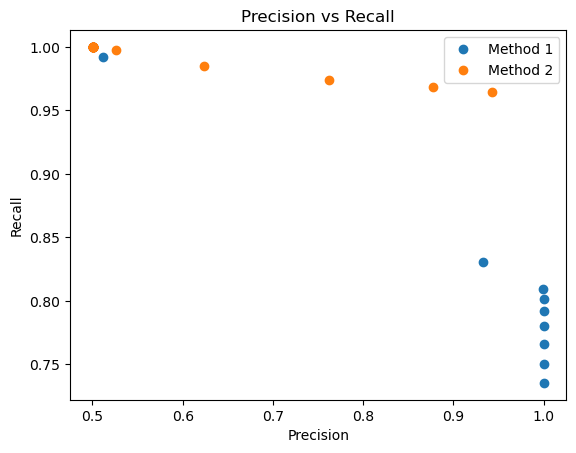

The method 1 seems to easily tend to a good precision, but at the cost of the recall. 
The method 1 seems to have a more consistent recall, but does not manage to have a precision of 1.
To compare both methods, we have to decide which parameter is more important to optimize.


In [376]:

plt.plot(precisions_method_1, recalls_method_1, 'o', label='Method 1')
plt.plot(precisions_method_2, recalls_method_2,'o',  label='Method 2')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision vs Recall')
plt.legend()
plt.show()
print('The method 1 seems to easily tend to a good precision, but at the cost of the recall. ')
print('The method 1 seems to have a more consistent recall, but does not manage to have a precision of 1.')
print( 'To compare both methods, we have to decide which parameter is more important to optimize.')